# Final Project - INFO6150 - Data Science Engineering Methods

# Topic - Craigslist Used Car Price Prediction

   ##### Team Members :- 
   - Neeraja Dixit - 001584742
   - Kunal Desai - 002193570

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
df=pd.read_csv(r'E:\MS_STUDY\Study\AA_SEM_2\DSE\Project\vehicles.csv')

In [4]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [5]:
df.shape

(458213, 26)

In [6]:
df.columns


Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Looking at the total number of columns, it seems that the below columns would not contribute much in predicting the car prices. Hence, we can drop them.
Columns to be dropped:-
   - 'Unnamed : 0'
   - 'id'
   - 'url'
   - 'region_url'
   - 'image_url'
   - 'VIN'

In [8]:
df.drop(['Unnamed: 0', 'id','url','region_url','image_url','VIN','posting_date'], axis=1, inplace=True)

In [9]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long'],
      dtype='object')

###### Also, the 'description' column won't seem to add much value to the model. Thus, dropping that as well.

In [31]:
df=df.drop('description',axis=1)

KeyError: "['description'] not found in axis"

In [11]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [12]:
df.shape

(458213, 18)

In [13]:
df[['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat',
       'long']].head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200


###### Finding NULLs in the dataset

In [14]:
def missingValuesPercentCheck():
    
    column_null=df.isnull().sum()#finding the sum of total null values in the dataset
    column_list=df.columns.values#finding the list of columns 

    #printing percentage of null values for each feature.
    missing_values={'Feature':[],'Missing %':[]}
    for i in range(len(column_list)):
        missing_values.get('Feature').append(column_list[i])
        missing_values.get('Missing %').append((column_null[i]/df.shape[0])*100)
    return pd.DataFrame(missing_values)


In [16]:
missingValuesPercentCheck()


,Feature,Missing %
0,region,0.000000
1,price,0.000000
2,year,0.229151
3,manufacturer,3.976317
4,model,1.057587
5,condition,42.107055
6,cylinders,37.349442
7,fuel,0.706440
8,odometer,12.069278
9,title_status,0.562402


<AxesSubplot:>

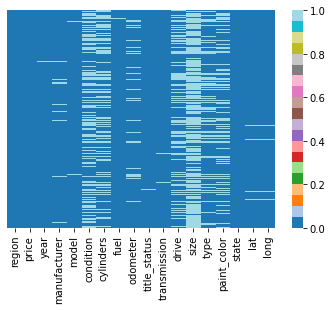

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='tab20')

As we have 70% of the data in Size column as NULL, we can conclude that the Size column will not contribute towards delivering good accuracy. Hence, we decide on dropping the Size column. 

In [33]:
df=df.drop('size',axis=1)

KeyError: "['size'] not found in axis"

In [34]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [35]:
df.shape

(458213, 17)

In [36]:
num_col=['year','odometer','lat','long']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color']

In [ ]:
df['fuel'].unique()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='fuel',y='price',palette=["red", "green", "blue", "goldenrod", "magenta"])
plt.title('Fuel Type Vs Price ')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
sns.despine()
plt.show()



In [ ]:
grp = df.groupby(['fuel']).size().reset_index(name='counts')

pieChart = px.pie(grp, values='counts', names='fuel',  title='Fuel Type Distribution',
                  color_discrete_sequence=px.colors.qualitative.Set2)
pieChart.show()

# Dropping description column as that column is of no use to us

In [ ]:
df=df.drop('description',axis=1)

In [ ]:
df['state']=df['state'].apply(lambda x : x.upper())

In [ ]:
df1=df.groupby(by=df['state'], as_index=False).mean()

In [ ]:
df1=df1[['state','price']]

In [ ]:
fig = px.choropleth(df1,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='price',
                    color_continuous_scale="Reds", 
                    
                    )
fig.show()


In [ ]:
df.nunique()

In [ ]:
df_year=df[['year','price','transmission']]
df_year=df_year.dropna()
df_year['year']=df_year['year'].apply(lambda x : int(float(x)))

In [ ]:
df_year.isnull().sum()

In [ ]:
df_sort=df_year.sort_values('year')

In [ ]:
df['price'].describe()

In [ ]:
fig = px.bar(df_sort, x="transmission", y="price",color=df_sort['transmission'],
  animation_frame="year", range_y=[0,2.149500e+07])
fig.update_layout(title=" transmission through the years", xaxis_title="Type",yaxis_title="Values",
                  legend_title="Type")
fig.update_xaxes(tickangle=12,title_standoff = 5,rangeselector_font_size=12,)

fig.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.set_palette('Set2')
sns.barplot(x=df['condition'],y=df['price'])
plt.title('Condition Vs Price ')
plt.xlabel('Condition')
plt.ylabel('Price')
sns.despine()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.set_palette("husl", 8)
sns.barplot(x=df['cylinders'],y=df['price'])
plt.title('Cylinders Vs Price ')
plt.xlabel('Cylinders')
plt.ylabel('Price')
sns.despine()
plt.show()